<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/tim-dchall-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dale Chall Word List EDA

In [4]:
import sys
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

!{sys.executable} -m pip install spacy -U -q

In [5]:
!{sys.executable} -m pip install pip install textdescriptives -U -q
!{sys.executable} -m spacy download en_core_web_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [6]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
urls = ['https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/dale_chall.txt',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/WikiLarge_Lemmatized_Train.csv']

d_chall = requests.get(urls[0]).text.split('\r')

wiki_df_train = pd.read_csv(urls[1])

In [47]:
d_chall = set([w for w in [w.lemma_.lower() for w in nlp(' '.join(d_chall))] if w not in set([' ', '-', '  '])])

In [48]:
tokenizer = lambda x: x.split(' ')
vectorizer = CountVectorizer(tokenizer=tokenizer)
X = vectorizer.fit_transform(wiki_df_train['lemmatized_text'])

In [49]:
feature_array = np.array(vectorizer.get_feature_names_out())
ix = np.where(np.array([True if f in d_chall else False for f in feature_array]))[0]
wiki_df_train['d_chall'] = np.array(X[:, ix].sum(axis=1))/np.array(X.sum(axis=1))

In [9]:
wiki_df_train

,Unnamed: 0,original_text,label,lemmatized_text,d_chall
0,0,There is manuscript evidence that Austen conti...,1,there be manuscript evidence that Austen conti...,0.488372
1,1,"In a remarkable comparative analysis , Mandaea...",1,"in a remarkable comparative analysis , mandaea...",0.280000
2,2,"Before Persephone was released to Hermes , who...",1,"before Persephone be release to Hermes , who h...",0.630435
3,3,Cogeneration plants are commonly found in dist...,1,cogeneration plant be commonly find in distric...,0.487179
4,4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,"Geneva -LRB- , ; , ; , ; ; -rrb- be the second...",0.428571
...,...,...,...,...,...
416763,416763,A Duke Nukem 3D version has been sold for Xbox...,0,a Duke Nukem 3d version have be sell for Xbox ...,0.470588
416764,416764,"However , it is becoming replaced as a method ...",0,"however , it be become replace as a method of ...",0.600000
416765,416765,There are hand gestures in both Hindu and Budd...,0,there be hand gesture in both Hindu and buddhi...,0.545455
416766,416766,"If it is necessary to use colors , try to choo...",0,"if it be necessary to use color , try to choos...",0.704545


mutual info gain: 0.0380832223501939


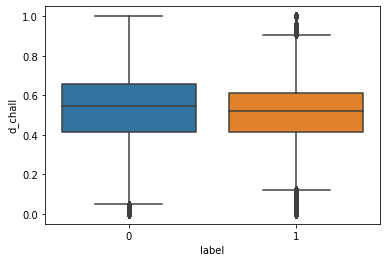

In [56]:
sns.boxplot(data=wiki_df_train, x='label', y='d_chall')
print('mutual info gain:', mutual_info_classif(wiki_df_train[['d_chall']], wiki_df_train['label'])[0])

In [10]:
len([w for w in d_chall if w not in feature_array])

64

In [8]:
import spacy
import textdescriptives as td

sample = (wiki_df_train.groupby('label')
  .apply(lambda grp: grp.sample(10000)))

nlp = spacy.load('en_core_web_lg')
nlp.add_pipe("textdescriptives")
docs = nlp.pipe(sample['original_text'])

In [9]:
wiki_read = td.extract_df(docs, metrics = ["readability"])
wiki_read['label'] = sample['label'].values

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
wiki_read.describe()

,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix,label
count,19986.000000,19986.000000,557.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,20000.000000
mean,62.999364,8.787396,10.308397,11.993393,10.310749,9.793941,43.003373,4.283398,0.500000
std,27.956276,5.172452,2.230090,6.451853,6.312858,5.545499,18.055064,3.260547,0.500013
min,-217.180000,-3.595000,3.129100,0.200000,-16.220000,-39.720000,0.500000,0.000000,0.000000
25%,47.832500,5.400000,8.841846,8.105882,6.157500,7.406000,31.222222,2.000000,0.000000
50%,65.168235,8.400000,10.504224,11.505882,9.760000,10.118520,42.333333,4.000000,0.500000
75%,80.332500,11.752222,11.855464,15.770370,13.851923,12.789091,53.444444,6.000000,1.000000
max,121.727500,43.800000,16.322122,41.600000,61.995000,72.300000,114.932203,33.000000,1.000000


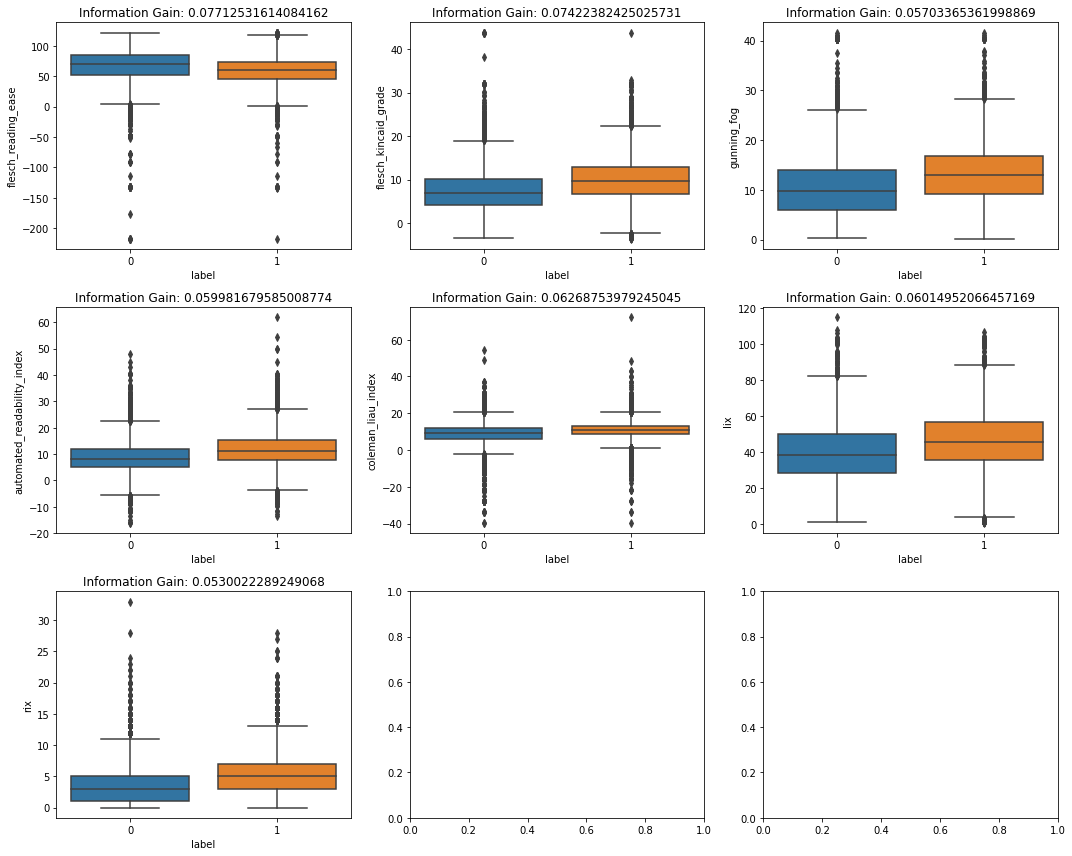

In [53]:
features = ['flesch_reading_ease', 'flesch_kincaid_grade', 
            'gunning_fog', 'automated_readability_index',
            'coleman_liau_index',	'lix',	'rix',]

def plot(df, features):
  fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

  for feature, ax in zip(features, axs.flat[:len(features)]):
    X = df[[feature]].dropna()
    y = df.loc[X.index]['label']
    ig = mutual_info_classif(X, y)[0]
    sns.boxplot(data=df, y=feature, x='label', ax=ax)
    ax.set_title(f'Information Gain: {ig}')

  fig.tight_layout()
  plt.show()

plot(wiki_read, features)